# Manufacturing drift detection demo using Pandas

## Dr. Tirthajyoti Sarkar

---

![header](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/manufacturing-drift-detection-header.png)

---

In [1]:
import pandas as pd
import numpy as np, matplotlib.pyplot as plt

In [2]:
machine_golden = pd.DataFrame(np.random.normal(size=(200,10)))

In [3]:
machines = {'machine'+str(i):[] for i in range(1,11)}
for i in range(1,11):
    loc = np.random.uniform(0,2)
    scale = np.random.uniform(0,2)
    df1 = machine_golden+pd.DataFrame(np.random.normal(loc=loc,scale=scale,size=(200,10)))
    machines['machine'+str(i)] = df1

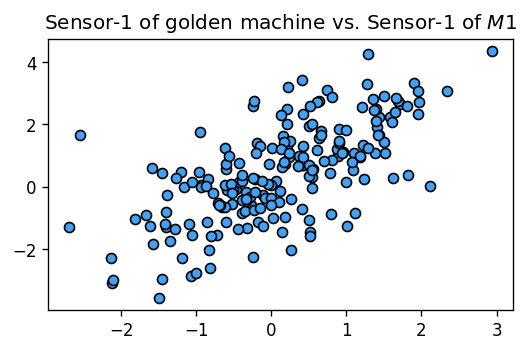

In [4]:
plt.figure(figsize=(5,3),dpi=120)
plt.scatter(machine_golden.loc[:,0],machines['machine1'].loc[:,0], 
            edgecolor='k', color='#42a1f5')
plt.title("Sensor-1 of golden machine vs. Sensor-1 of $M$1")
plt.show()

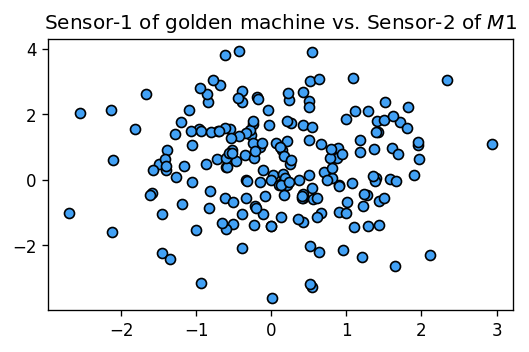

In [5]:
plt.figure(figsize=(5,3),dpi=120)
plt.scatter(machine_golden.loc[:,0],machines['machine1'].loc[:,1],
           edgecolor='k', color='#42a1f5')
plt.title("Sensor-1 of golden machine vs. Sensor-2 of $M$1")
plt.show()

In [6]:
for machine in machines:
    print(f"Correlation of {machine} with the golden tester:", round(machine_golden.corrwith(machines[machine],axis=1).sum(),2))

Correlation of machine1 with the golden tester: 130.67
Correlation of machine2 with the golden tester: 91.78
Correlation of machine3 with the golden tester: 116.57
Correlation of machine4 with the golden tester: 178.85
Correlation of machine5 with the golden tester: 147.76
Correlation of machine6 with the golden tester: 150.91
Correlation of machine7 with the golden tester: 199.94
Correlation of machine8 with the golden tester: 192.48
Correlation of machine9 with the golden tester: 199.73
Correlation of machine10 with the golden tester: 97.73


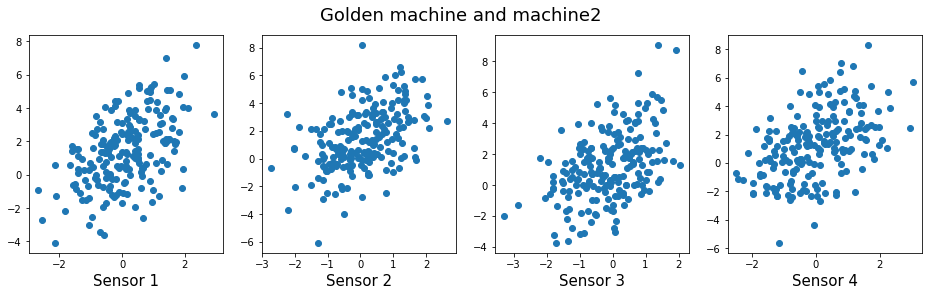

In [25]:
fig,ax  = plt.subplots(1,4,figsize=(16,4))
plt.suptitle("Golden machine and machine2", fontsize=18,va='top')
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(machine_golden.loc[:,i],machines['machine2'].loc[:,i])
    ax[i].set_xlabel(f"Sensor {i+1}",fontsize=15)
plt.show()

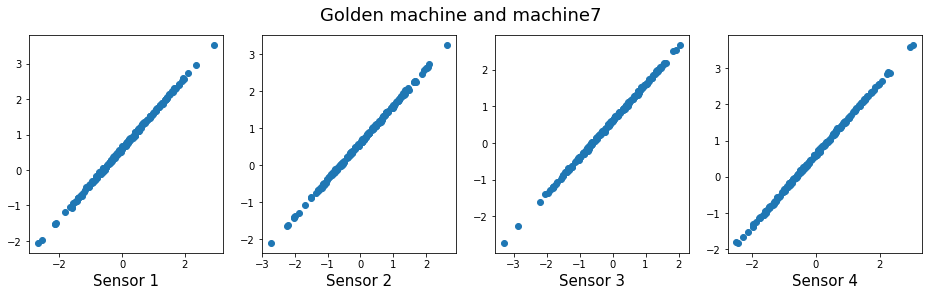

In [26]:
fig,ax  = plt.subplots(1,4,figsize=(16,4))
plt.suptitle("Golden machine and machine7", fontsize=18)
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(machine_golden.loc[:,i],machines['machine7'].loc[:,i])
    ax[i].set_xlabel(f"Sensor {i+1}",fontsize=15)
plt.show()

In [13]:
import seaborn as sns

<Figure size 720x480 with 0 Axes>

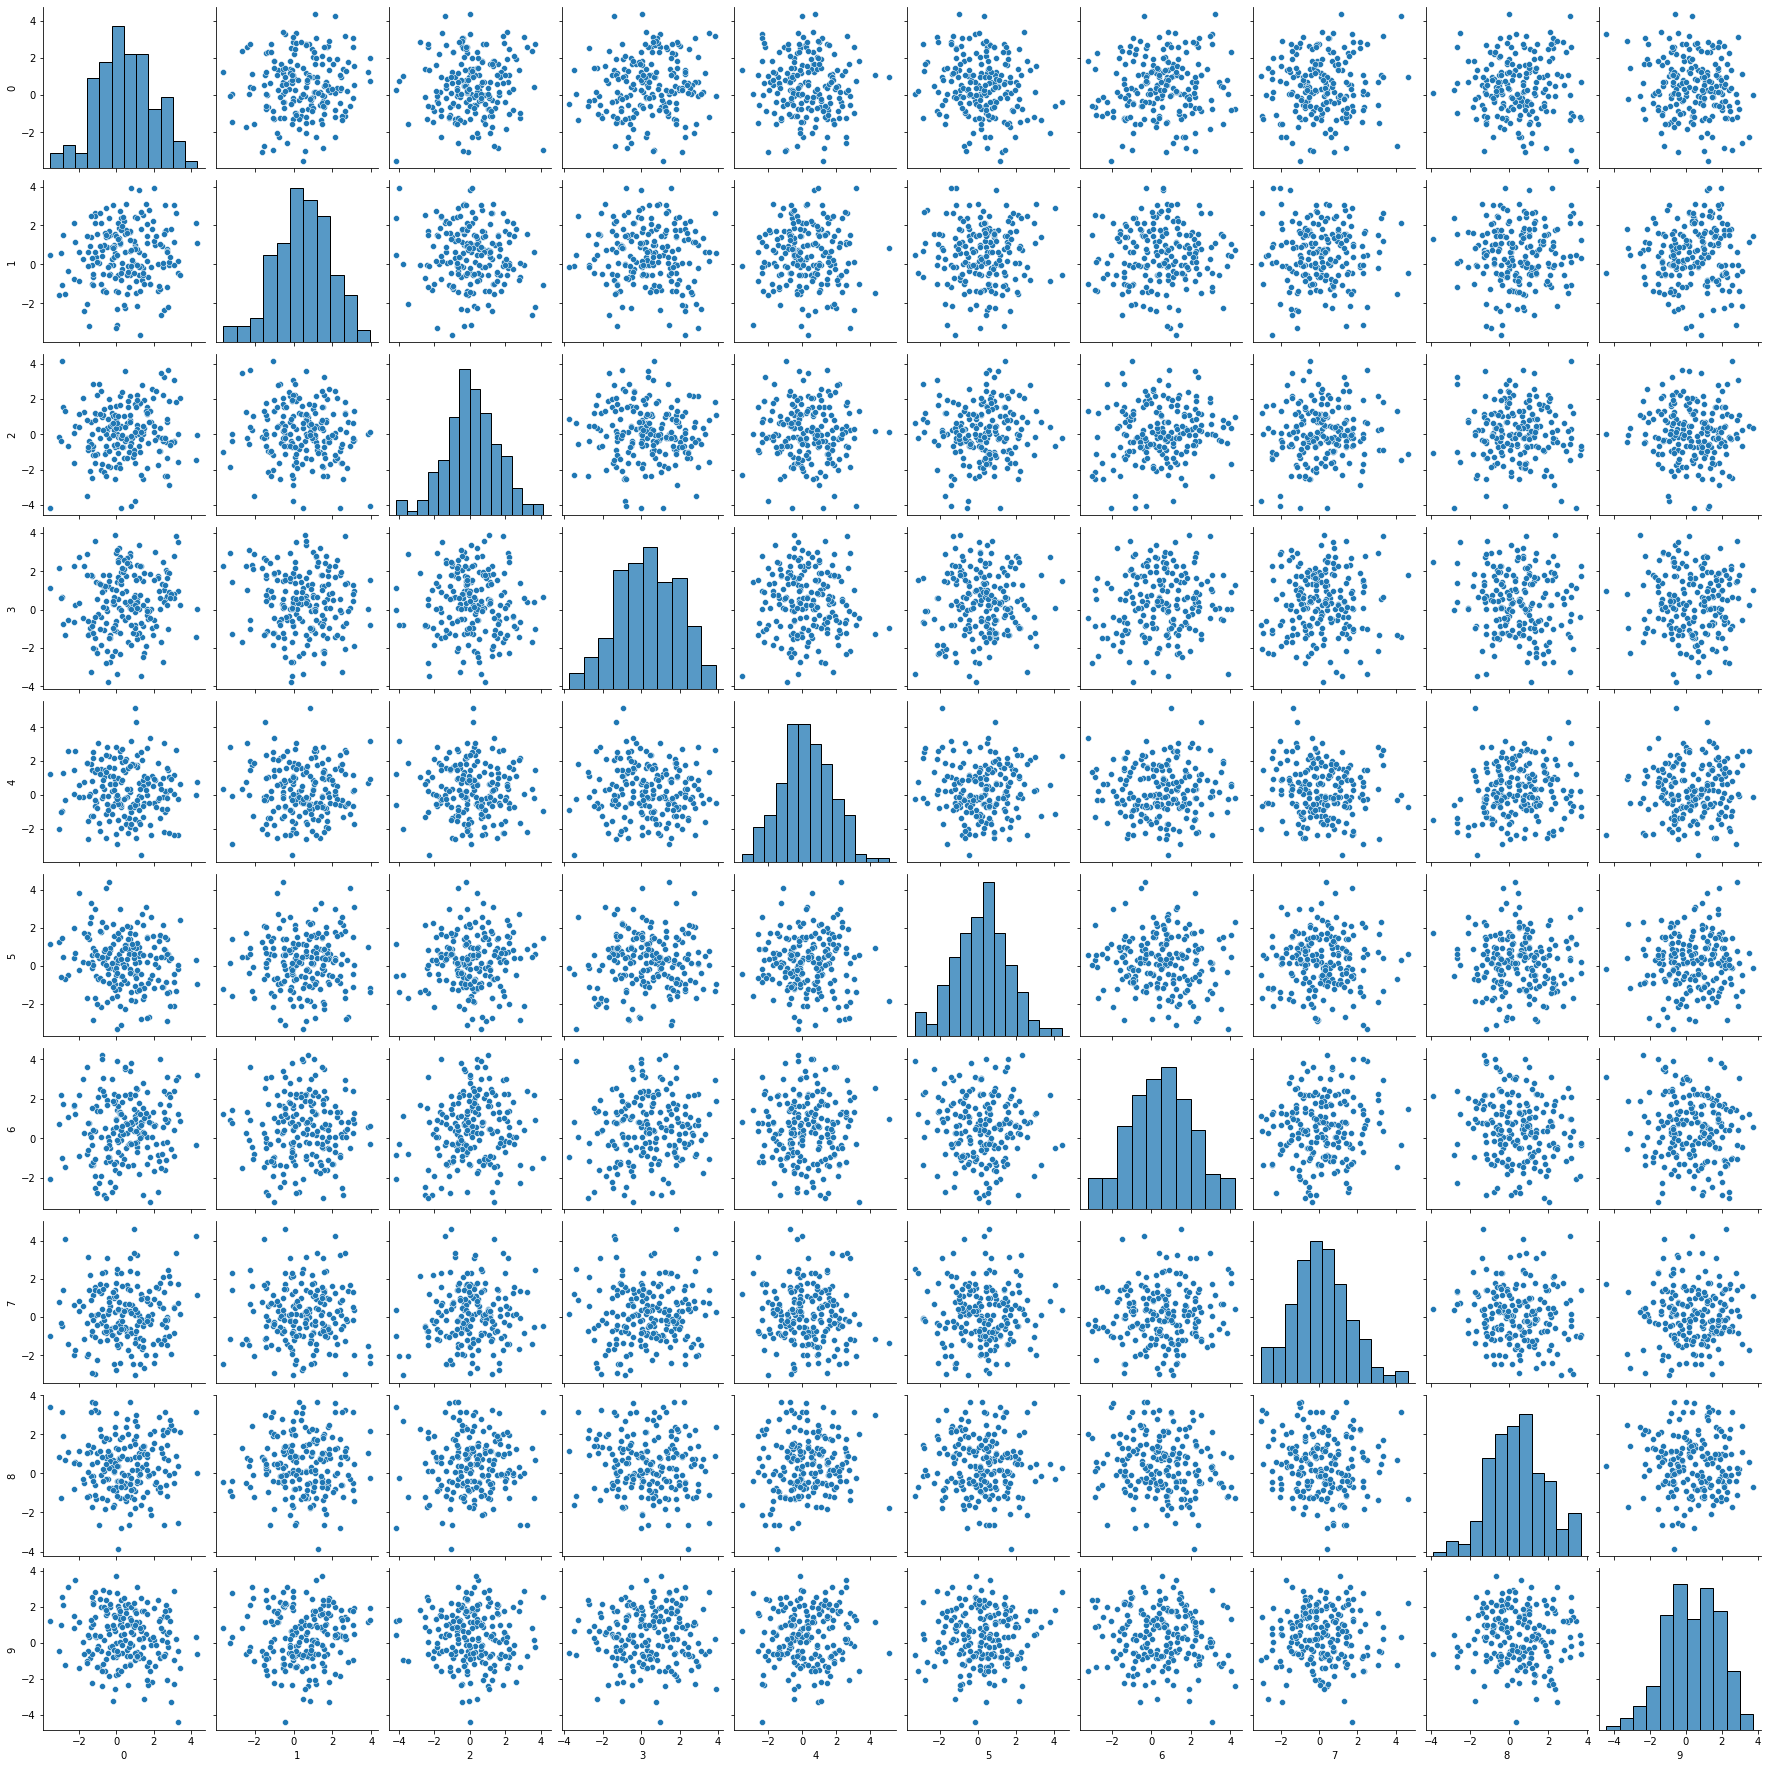

In [14]:
plt.figure(dpi=120)
sns.pairplot(data=machines['machine1'])
plt.show()

In [27]:
corr_score = {'machine'+str(i):[] for i in range(1,11)}
for machine in machines:
    score = round(machine_golden.corrwith(machines[machine],axis=1).sum(),2)
    corr_score[machine] = score

In [44]:
def color_vals(x):
    if x > 100:
        return '#42a1f5'
    else:
        return 'red'

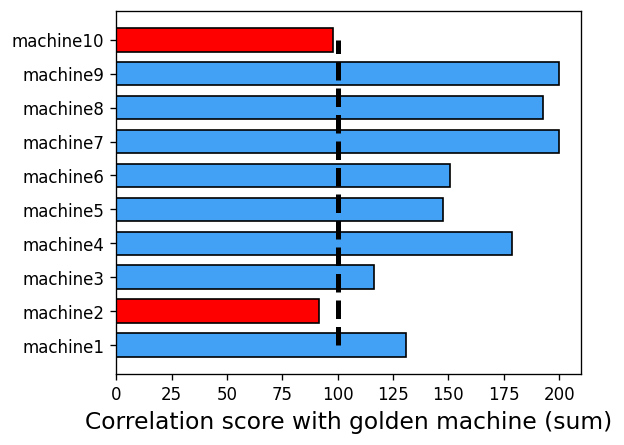

In [49]:
plt.figure(figsize=(5,4),dpi=120)
plt.barh(y=list(corr_score.keys()),width = corr_score.values(), 
         color=list(map(color_vals,list(corr_score.values()))), edgecolor='k',height=0.7)
plt.vlines(x=100,ymin='machine1',ymax='machine10',
           linewidth=3,color='k',linestyle='--')
plt.xlabel("Correlation score with golden machine (sum)",fontsize=14)
plt.show()